In [11]:
import numpy as np
import pickle
import os
from os.path import join

import dnnlib
import dnnlib.tflib as tflib
from encoder.generator_model import Generator

from matplotlib import pyplot as plt
%matplotlib inline

class Shower():
    def __init__(self, col=2):
        self.col = col
        self.objs = []
    
    def add(self, obj):
        if not isinstance(obj, dict):
            obj = {'image': obj}
        self.objs.append(obj)
    
    def show(self, save_name=None):
        n, row, col = len(self.objs), (len(self.objs) + self.col - 1) // self.col, self.col
        plt.subplots_adjust(wspace=0)
        for i, obj in enumerate(self.objs):
            image = obj['image']
            plt.subplot(row, col, i + 1)
            plt.axis('off')
            plt.imshow(image, cmap='gray')
            if 'title' in obj:
                plt.title(obj['title'])
        if save_name is not None:
            plt.savefig('./examples/{}.png'.format(save_name))
        plt.show()

os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [28]:
model_url = './cache/karras2019stylegan-ffhq-1024x1024.pkl'
dlatent_path = './data'
batch_size = 1
image_ids = ['67138', '67139', 'sumiao', 'style']

In [3]:
tflib.init_tf()
with open(model_url, 'rb') as f:
    generator_network, discriminator_network, Gs_network = pickle.load(f)

generator = Generator(Gs_network, batch_size);



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
def load_dlatent(image_id):
    dl_path = join(dlatent_path, image_id + '.npy')
    dlatent = np.load(dl_path)
    dlatent = dlatent.reshape(-1, 18, 512)
    return dlatent

In [5]:
dlatent0 = load_dlatent(image_ids[0])
dlatent1 = load_dlatent(image_ids[1])

generated
generated
generated
generated


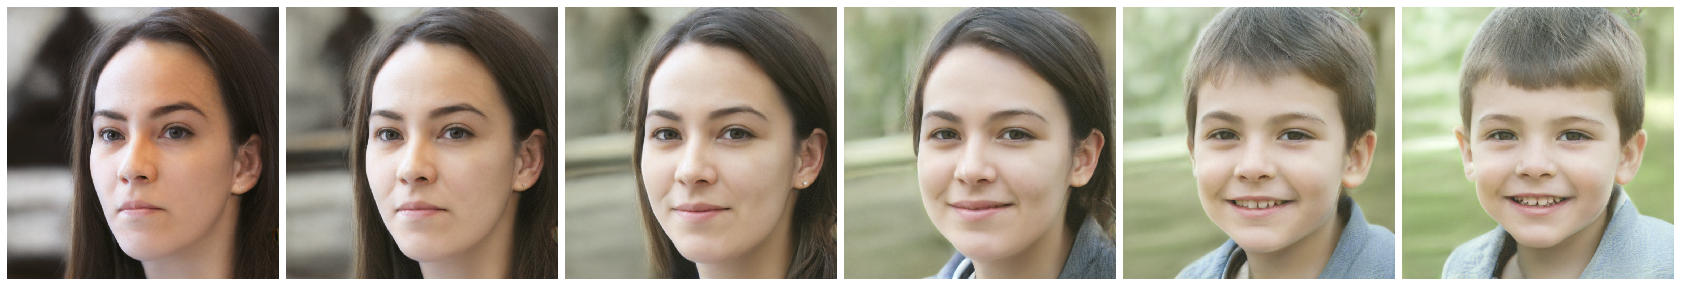

In [15]:
image0 = generator.generate_images(dlatent0)[0]
image1 = generator.generate_images(dlatent1)[0]

shower = Shower(col=7)
plt.figure(figsize=(35, 5))
shower.add(image0)
for i in range(2, 10, 2):
    w = i / 10.
    dlatent = dlatent0 * ( 1 - w) + dlatent1 * w
    image_fuse = generator.generate_images(dlatent)[0]
    shower.add(image_fuse)
    print('generated')
shower.add(image1)
shower.show()

In [21]:
######################### style transfer

In [35]:
dlatent_style = load_dlatent(image_ids[3])

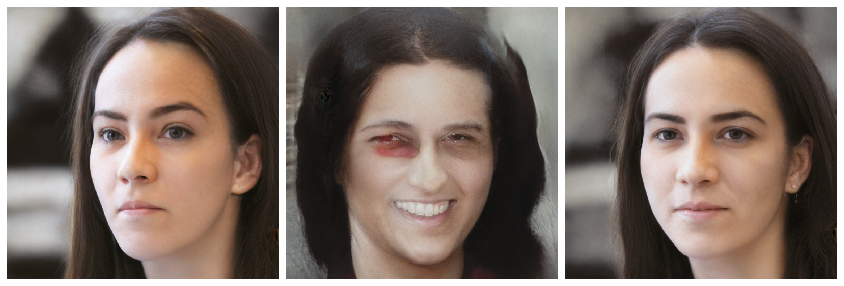

In [37]:
shower = Shower(3)
plt.figure(figsize=(3 * 5, 5))
shower.add(generator.generate_images(dlatent0)[0])
shower.add(generator.generate_images(dlatent_style)[0])

w = 0.7
new_dlatent = dlatent0 * w + dlatent_style * (1 - w)
shower.add(generator.generate_images(new_dlatent)[0])

shower.show()